<a href="https://colab.research.google.com/github/Sachinsachin21/Deep_learning/blob/main/BostonHousng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data= pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
x= data.iloc[:,:-1].values
y= data.iloc[:,-1].values
x,y

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

In [19]:
x.shape,y.shape

((506, 13), (506,))

In [5]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [7]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [8]:
model=keras.Sequential([
    keras.layers.Dense(64,input_shape=(13,),activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(2,activation='relu'),
    keras.layers.Dense(1)
])


In [9]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3541 (13.83 KB)
Trainable params: 3541 (13.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history=model.fit(x_train_scaled, y_train, epochs=80,batch_size=32,validation_split=0.2)

Epoch 1/80
11/11 [==============================] - 2s 29ms/step - loss: 572.3147 - mae: 22.0144 - val_loss: 652.4960 - val_mae: 23.6990
Epoch 2/80
11/11 [==============================] - 0s 7ms/step - loss: 571.5108 - mae: 21.9951 - val_loss: 651.9739 - val_mae: 23.6880
Epoch 3/80
11/11 [==============================] - 0s 6ms/step - loss: 571.0318 - mae: 21.9841 - val_loss: 651.4548 - val_mae: 23.6770
Epoch 4/80
11/11 [==============================] - 0s 7ms/step - loss: 570.5509 - mae: 21.9730 - val_loss: 650.9319 - val_mae: 23.6659
Epoch 5/80
11/11 [==============================] - 0s 6ms/step - loss: 570.0641 - mae: 21.9621 - val_loss: 650.4139 - val_mae: 23.6550
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 569.5850 - mae: 21.9511 - val_loss: 649.8965 - val_mae: 23.6440
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 569.1022 - mae: 21.9402 - val_loss: 649.3839 - val_mae: 23.6332
Epoch 8/80
11/11 [=============================

In [12]:
y_pred = model.predict(x_test_scaled)
loss, mae = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Mean Absolute Error: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

4/4 [==============================] - 0s 4ms/step - loss: 8.6519 - mae: 2.3164
Test Loss: 8.651898384094238
Test Mean Absolute Error: 2.316356658935547
R-squared: 0.8695897132287602


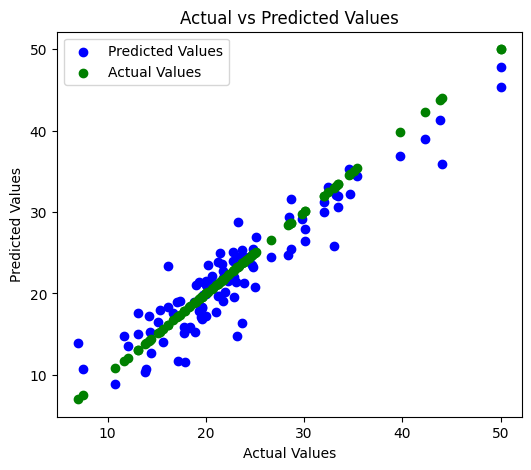

In [13]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.scatter(y_test, y_test, color='green', label='Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend(loc='upper left')
plt.show()

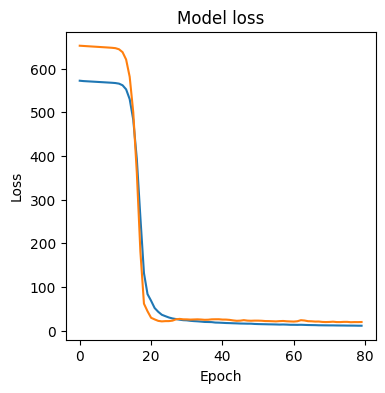

In [14]:
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [18]:
def get_user_input_and_predict(model, scaler):
    feature_names = [
        'per capita crime rate by town',
        'Proportion of residential land zoned',
        'Proportion of non-retail business acres',
        'Charles River :1 if tract bounds river; 0 otherwise',
        'Nitric Oxides concentration',
        'Number of rooms',
        'Proportion of owner-occupied units',
        'Weighted distances to five Boston employment centres',
        'Index of accessibility to radial highways',
        'Full-value property-tax rate per $10,000',
        'Pupil-teacher ratio by town',
        'proportion of blacks by town',
        '% lower status of the population'

    ]

    print("Please enter the values in numbers for the following features:")
    user_input = []
    for i, feature in enumerate(feature_names):
        value = float(input(f"{feature}: "))
        user_input.append(value)
    user_input = np.array(user_input).reshape(1, -1)
    user_input_scaled = scaler.transform(user_input)
    prediction = model.predict(user_input_scaled)
    return prediction

y_pred = get_user_input_and_predict(model, scaler)
print(f"Median Value of the house : {y_pred[0][0]}")

Please enter the values in numbers for the following features:
per capita crime rate by town: 0.02985
Proportion of residential land zoned: 0
Proportion of non-retail business acres: 2.18
Charles River :1 if tract bounds river; 0 otherwise: 0
Nitric Oxides concentration: 0.458
Number of rooms: 6.43
Proportion of owner-occupied units: 58.7
Weighted distances to five Boston employment centres: 6.0622
Index of accessibility to radial highways: 3
Full-value property-tax rate per $10,000: 222
Pupil-teacher ratio by town: 18.7
proportion of blacks by town: 394.12
% lower status of the population: 5.21
1/1 [==============================] - 0s 26ms/step
Median Value of the house : 26.106975555419922
